In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame

In [2]:
# movie_runtimeMinutes
title_basics = pd.read_csv('title.basics.tsv', delimiter='\t', encoding='utf-8')
movie_time = title_basics[title_basics['titleType'] == 'movie']  # only movie
movie_time = movie_time[movie_time['runtimeMinutes'] != '\\N']   # filter movie without time 

# movie_ratings
uid = movie_time['tconst']
title_ratings = pd.read_csv('title.ratings.tsv', delimiter='\t', encoding='utf-8')
movie_ratings = title_ratings[title_ratings['tconst'].isin(uid.values)]
movie_ratings = movie_ratings[movie_ratings['numVotes'] > 100]   # only votes > 100

uid_final = movie_ratings['tconst']
movie_time = movie_time[movie_time['tconst'].isin(uid_final.values)]
movie_ratings = movie_ratings[movie_ratings['tconst'].isin(uid_final.values)]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
length = list()
for i in movie_time['runtimeMinutes'].values:
    length.append(int(i))

ratings = list()
for i in movie_ratings['averageRating'].values:
    ratings.append(float(i))

statis = {'length':length, 'ratings':ratings}
statis = DataFrame(statis)
print("Mean ratings: %f" % statis['ratings'].mean())

Mean ratings: 6.105920


In [4]:
# interval divide: <60, >180, [60,180] 10 step
means = {}
counts = {}
start, end = 0, 60
while end <= 180:    
    interval = "%d~%d"%(start,end)
    picked = statis[statis['length'].isin(range(start,end))]
    count = len(picked)
    averating = picked['ratings'].mean()
    start = end
    end += 10    
    means[interval] = averating
    counts[interval] = count

picked = statis[statis['length']>180]
interval = ">180"
count = len(picked)
averating = picked['ratings'].mean()
means[interval] = averating
counts[interval] = count

print(counts)
print(means)

{'0~60': 944, '60~70': 1827, '70~80': 4753, '80~90': 14898, '90~100': 22920, '100~110': 13742, '110~120': 6967, '120~130': 3770, '130~140': 2114, '140~150': 1391, '150~160': 1085, '160~170': 672, '170~180': 331, '>180': 494}
{'0~60': 6.5010593220339, '60~70': 6.2282977558839745, '70~80': 5.961455922575181, '80~90': 5.74463015169818, '90~100': 5.875772251308938, '100~110': 6.247496725367511, '110~120': 6.521214295966695, '120~130': 6.6483023872679174, '130~140': 6.729895931882694, '140~150': 6.652408339324242, '150~160': 6.576774193548392, '160~170': 6.668898809523806, '170~180': 6.949546827794564, '>180': 7.2935222672064715}


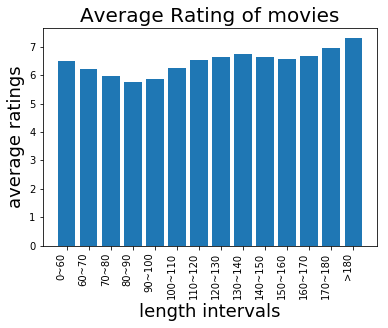

In [5]:
# plot averRatings
fig, ax = plt.subplots()
ax.bar(np.arange(len(means)), list(means.values()))
ax.set_title('Average Rating of movies', fontsize=20)
ax.set_xlabel('length intervals', fontsize=18)
ax.set_ylabel('average ratings', fontsize=18)

plt.xticks(np.arange(len(means)), list(means.keys()))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


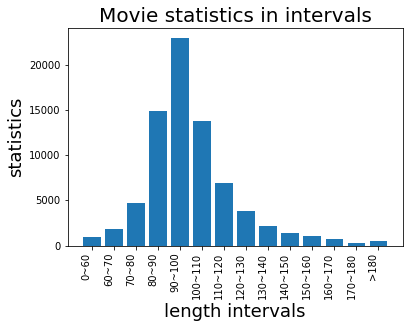

In [6]:
# plot counts

fig, ax = plt.subplots()
ax.bar(np.arange(len(counts)), list(counts.values()))
ax.set_title('Movie statistics in intervals', fontsize=20)
ax.set_xlabel('length intervals', fontsize=18)
ax.set_ylabel('statistics', fontsize=18)

plt.xticks(np.arange(len(counts)), list(counts.keys()))
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()